Optimal portfolio allocation (fraction investment in each asset):
Asset 0: 0.00
Asset 1: 0.07
Asset 2: 0.93
Asset 3: 0.00
Optimal objective value (minimized risk-adjusted loss): -0.108687


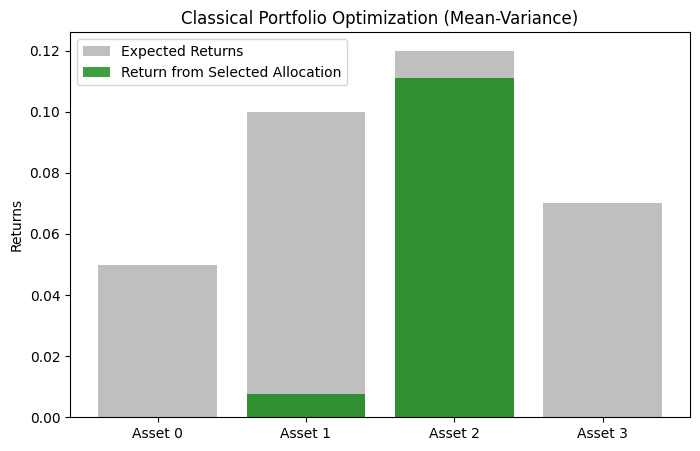

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

np.random.seed(42)
num_assets = 4
expected_returns = np.array([0.05, 0.10, 0.12, 0.07])
covariance = np.array([
    [0.005, -0.010, 0.004, -0.002],
    [-0.010, 0.040, -0.002, 0.004],
    [0.004, -0.002, 0.023, 0.002],
    [-0.002, 0.004, 0.002, 0.018]
])
risk_aversion = 0.5

def objective(x):
    return risk_aversion * np.dot(x, np.dot(covariance, x)) - np.dot(expected_returns, x)

constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = [(0, 1) for _ in range(num_assets)]
x0 = np.ones(num_assets) / num_assets

result = minimize(objective, x0, bounds=bounds, constraints=constraints)
x_opt = result.x

print("Optimal portfolio allocation (fraction investment in each asset):")
for i, xi in enumerate(x_opt):
    print(f"Asset {i}: {xi:.2f}")

print(f"Optimal objective value (minimized risk-adjusted loss): {result.fun:.6f}")

plt.figure(figsize=(8,5))
plt.bar(range(num_assets), expected_returns, color='grey', alpha=0.5, label="Expected Returns")
plt.bar(range(num_assets), x_opt * expected_returns, color='green', alpha=0.75, label="Return from Selected Allocation")
plt.xticks(range(num_assets), [f'Asset {i}' for i in range(num_assets)])
plt.title('Classical Portfolio Optimization (Mean-Variance)')
plt.ylabel('Returns')
plt.legend()
plt.show()


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

np.random.seed(42)
num_assets = 6
expected_returns = np.array([0.05, 0.10, 0.12, 0.07, 0.09, 0.11])
covariance = np.array([
    [0.005, -0.010, 0.004, -0.002, 0.001, -0.003],
    [-0.010, 0.040, -0.002, 0.004, -0.001, 0.002],
    [0.004, -0.002, 0.023, 0.002, 0.003, 0.001],
    [-0.002, 0.004, 0.002, 0.018, -0.002, 0.002],
    [0.001, -0.001, 0.003, -0.002, 0.017, 0.004],
    [-0.003, 0.002, 0.001, 0.002, 0.004, 0.015]
])
risk_aversion = 0.3
transaction_cost = 0.01
prev_allocation = np.array([0.1, 0.2, 0.1, 0.25, 0.15, 0.2])

def objective(x):
    risk_term = risk_aversion * np.dot(x, np.dot(covariance, x))
    return_term = -np.dot(expected_returns, x)
    cost_term = transaction_cost * np.sum(np.abs(x - prev_allocation))
    return risk_term + return_term + cost_term

constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = [(0, 1) for _ in range(num_assets)]
x0 = np.ones(num_assets) / num_assets

result = minimize(objective, x0, bounds=bounds, constraints=constraints)
x_opt = result.x

print("Advanced Optimal portfolio allocation:")
for i, xi in enumerate(x_opt):
    print(f"Asset {i}: {xi:.4f}")

print(f"Objective value (with transaction cost): {result.fun:.6f}")


Advanced Optimal portfolio allocation:
Asset 0: 0.0000
Asset 1: 0.1998
Asset 2: 0.6002
Asset 3: 0.0000
Asset 4: 0.0000
Asset 5: 0.2001
Objective value (with transaction cost): -0.100879


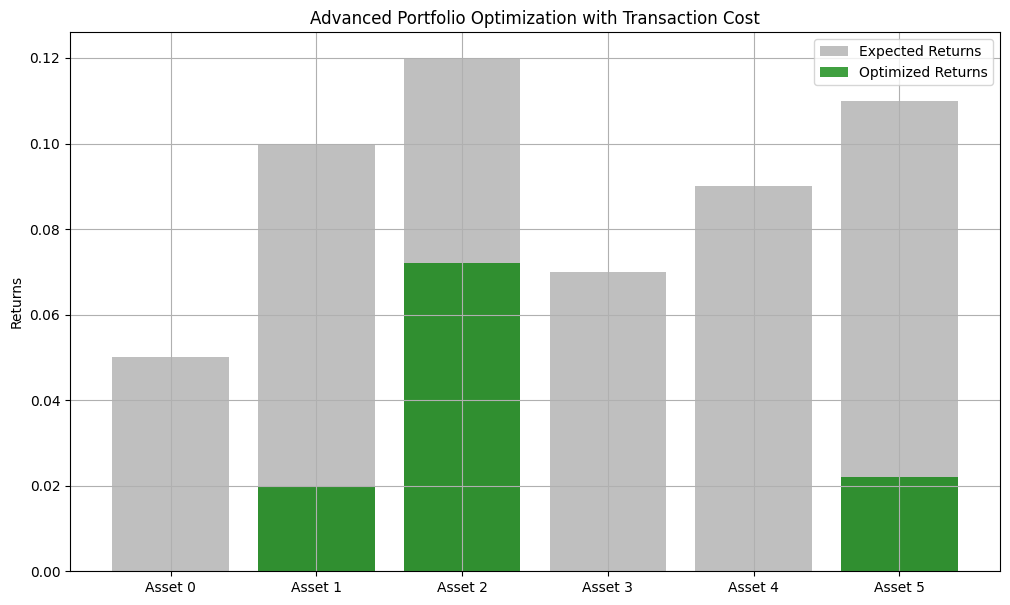

Advanced Optimal portfolio allocation:
Asset 0: 0.0000
Asset 1: 0.1998
Asset 2: 0.6002
Asset 3: 0.0000
Asset 4: 0.0000
Asset 5: 0.2001
Objective value (with transaction cost): -0.100879


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

np.random.seed(42)
num_assets = 6
expected_returns = np.array([0.05, 0.10, 0.12, 0.07, 0.09, 0.11])
covariance = np.array([
    [0.005, -0.010, 0.004, -0.002, 0.001, -0.003],
    [-0.010, 0.040, -0.002, 0.004, -0.001, 0.002],
    [0.004, -0.002, 0.023, 0.002, 0.003, 0.001],
    [-0.002, 0.004, 0.002, 0.018, -0.002, 0.002],
    [0.001, -0.001, 0.003, -0.002, 0.017, 0.004],
    [-0.003, 0.002, 0.001, 0.002, 0.004, 0.015]
])
risk_aversion = 0.3
transaction_cost = 0.01
prev_allocation = np.array([0.1, 0.2, 0.1, 0.25, 0.15, 0.2])

def objective(x):
    risk_term = risk_aversion * np.dot(x, np.dot(covariance, x))
    return_term = -np.dot(expected_returns, x)
    cost_term = transaction_cost * np.sum(np.abs(x - prev_allocation))
    return risk_term + return_term + cost_term

constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = [(0, 1) for _ in range(num_assets)]
x0 = np.ones(num_assets) / num_assets

result = minimize(objective, x0, bounds=bounds, constraints=constraints)
x_opt = result.x

plt.figure(figsize=(12, 7))
plt.bar(range(num_assets), expected_returns, color='grey', alpha=0.5, label='Expected Returns')
plt.bar(range(num_assets), x_opt * expected_returns, color='green', alpha=0.75, label='Optimized Returns')
plt.xticks(range(num_assets), [f'Asset {i}' for i in range(num_assets)])
plt.title('Advanced Portfolio Optimization with Transaction Cost')
plt.ylabel('Returns')
plt.legend()
plt.grid(True)
plt.show()

print("Advanced Optimal portfolio allocation:")
for i, xi in enumerate(x_opt):
    print(f"Asset {i}: {xi:.4f}")
print(f"Objective value (with transaction cost): {result.fun:.6f}")
